In [1]:
# for visualization of layers
! pip install graphviz

# basic visualization library for NN models
!pip install hiddenlayer

In [36]:
import torch
import hiddenlayer as hl

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

In [4]:
data = pd.read_csv('datasets/bike_sharing.csv', index_col=0)

In [6]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
data.shape

(731, 16)

/home/neeraj/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of bikes rented per person')

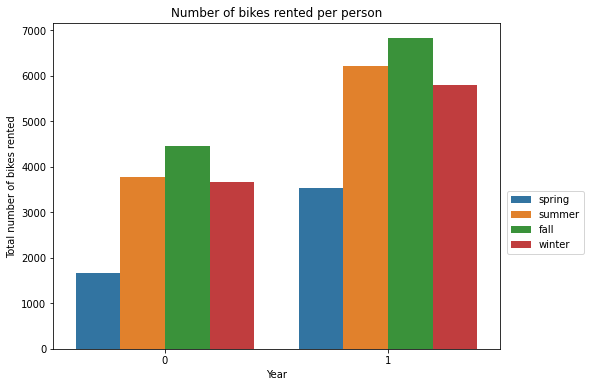

In [8]:
plt.figure(figsize=(8, 6))

sns.barplot('yr', 'cnt', hue='season', data=data, ci=None)

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented')

plt.title('Number of bikes rented per person')

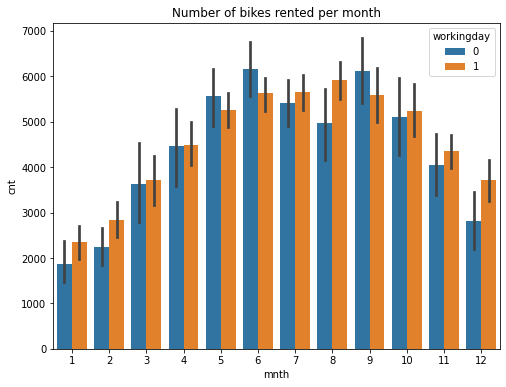

In [10]:
plt.figure(figsize=(8, 6))

sns.barplot(x='mnth', y='cnt', hue='workingday', data=data)

plt.title('Number of bikes rented per month')
plt.show()

Text(0, 0.5, 'Total number of bikes rented')

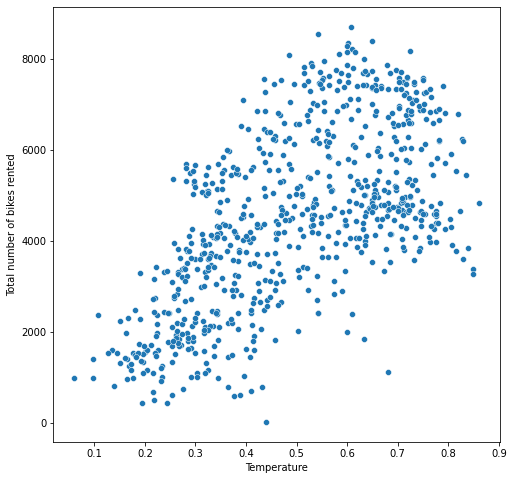

In [14]:
plt.figure(figsize=(8, 8))

sns.scatterplot(x='temp', y='cnt', data=data)

plt.xlabel('Temperature')
plt.ylabel('Total number of bikes rented')

In [15]:
# preprocess the data

data = pd.get_dummies(data, columns=['season'])

data.sample(5)

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_fall,season_spring,season_summer,season_winter
242,243,2011-08-31,0,8,0,3,1,1,0.656667,0.611121,0.597917,0.083333,688,4370,5058,1,0,0,0
480,481,2012-04-25,1,4,0,3,1,1,0.476667,0.470317,0.427917,0.118792,655,5541,6196,0,0,1,0
31,32,2011-02-01,0,2,0,2,1,2,0.192174,0.234530,0.829565,0.053213,47,1313,1360,0,1,0,0
141,142,2011-05-22,0,5,0,0,0,1,0.604167,0.574500,0.749583,0.148008,1576,3084,4660,0,0,1,0
148,149,2011-05-29,0,5,0,0,0,1,0.667500,0.615550,0.818750,0.213938,2355,2433,4788,0,0,1,0


In [16]:
# Picking relevant features

columns = ['registered', 'holiday', 'weekday',
           'weathersit', 'temp', 'atemp',
           'season_fall', 'season_spring',
           'season_summer', 'season_winter']

features = data[columns]

In [18]:
features.head()

,registered,holiday,weekday,weathersit,temp,atemp,season_fall,season_spring,season_summer,season_winter
0,654,0,6,2,0.344167,0.363625,0,1,0,0
1,670,0,0,2,0.363478,0.353739,0,1,0,0
2,1229,0,1,1,0.196364,0.189405,0,1,0,0
3,1454,0,2,1,0.200000,0.212122,0,1,0,0
4,1518,0,3,1,0.226957,0.229270,0,1,0,0


In [19]:
target = data[['cnt']]

In [20]:
target.head()

,cnt
0,985
1,801
2,1349
3,1562
4,1600


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size=0.2)

In [23]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float)

Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

In [24]:
X_train_tensor.shape

torch.Size([584, 10])

In [26]:
Y_train_tensor.shape

torch.Size([584, 1])

In [27]:
import torch.utils.data as data_utils

In [29]:
# batch our data in training and test

train_data = data_utils.TensorDataset(X_train_tensor, Y_train_tensor)

In [30]:
train_loader = data_utils.DataLoader(train_data, batch_size=100, shuffle=True)

In [31]:
len(train_loader)

6

In [33]:
# iterate through the batches in your dataset
# next function will load first batch of features and target labels

features_batch, target_batch = iter(train_loader).next()

In [34]:
features_batch.shape

torch.Size([100, 10])

In [35]:
target_batch.shape

torch.Size([100, 1])

## Building the Neural Network

In [37]:
inp = X_train_tensor.shape[1]
out = 1

hid = 10

loss_fn = torch.nn.MSELoss()

In [38]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.Linear(hid, out))

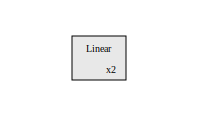

In [39]:
hl.build_graph(model, torch.zeros([10, inp]))   # 10 is the arbitrary batch size that we have chosen and 
                                                # inp is the no of features in pour training data

In [40]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) 

In [41]:
total_step = len(train_loader)
num_epochs = 10000

for epoch in range(num_epochs + 1):
    for i, (features, target) in enumerate(train_loader):
        output = model(features)
        loss = loss_fn(output, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 2000 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/10000], Step [1/6], Loss: 27806184.0000
Epoch [1/10000], Step [2/6], Loss: 29331800.0000
Epoch [1/10000], Step [3/6], Loss: 28002100.0000
Epoch [1/10000], Step [4/6], Loss: 28058512.0000
Epoch [1/10000], Step [5/6], Loss: 26575880.0000
Epoch [1/10000], Step [6/6], Loss: 29251396.0000
Epoch [2001/10000], Step [1/6], Loss: 366682.2500
Epoch [2001/10000], Step [2/6], Loss: 353581.1562
Epoch [2001/10000], Step [3/6], Loss: 313880.1562
Epoch [2001/10000], Step [4/6], Loss: 445519.7188
Epoch [2001/10000], Step [5/6], Loss: 460677.4375
Epoch [2001/10000], Step [6/6], Loss: 261894.0938
Epoch [4001/10000], Step [1/6], Loss: 286938.0312
Epoch [4001/10000], Step [2/6], Loss: 216541.7031
Epoch [4001/10000], Step [3/6], Loss: 314464.1562
Epoch [4001/10000], Step [4/6], Loss: 222018.9219
Epoch [4001/10000], Step [5/6], Loss: 369072.7188
Epoch [4001/10000], Step [6/6], Loss: 560792.2500
Epoch [6001/10000], Step [1/6], Loss: 308934.9062
Epoch [6001/10000], Step [2/6], Loss: 351354.4375
Epoch 

In [42]:
# switch to evaluation before prediction because we may have layers that perform 
# differently during training and prediction such as dropout and batch normalization 

model.eval()

with torch.no_grad():
    y_pred = model(x_test_tensor)

In [43]:
sample = x_test.iloc[45]
sample

registered       5085.000000
holiday             0.000000
weekday             2.000000
weathersit          1.000000
temp                0.565000
atemp               0.542929
season_fall         0.000000
season_spring       1.000000
season_summer       0.000000
season_winter       0.000000
Name: 437, dtype: float64

In [44]:
sample_tensor = torch.tensor(sample.values, dtype=torch.float)

sample_tensor

tensor([5.0850e+03, 0.0000e+00, 2.0000e+00, 1.0000e+00, 5.6500e-01, 5.4293e-01,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00])

In [45]:
with torch.no_grad():
    y_pred = model(sample_tensor)
    
print("Predicted count : ", (y_pred.item()))
print("Actual count : ", (y_test.iloc[45]))

Predicted count :  5830.26953125
Actual count :  cnt    5847
Name: 437, dtype: int64


In [46]:
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)

In [47]:
y_pred = y_pred_tensor.detach().numpy()

y_pred.shape

(147, 1)

In [48]:
y_test.values.shape

(147, 1)

In [49]:
compare_df = pd.DataFrame({'actual': np.squeeze(y_test.values), 'predicted': np.squeeze(y_pred)})

compare_df

,actual,predicted
0,3717,3369.050537
1,6779,6910.323242
2,3141,3593.696045
3,441,302.120789
4,5010,4146.716309
...,...,...
142,3126,4006.100098
143,4862,5387.926270
144,2475,2733.161377
145,7013,6927.286133


In [51]:
sklearn.metrics.r2_score(y_test, y_pred)

0.8884478492071451

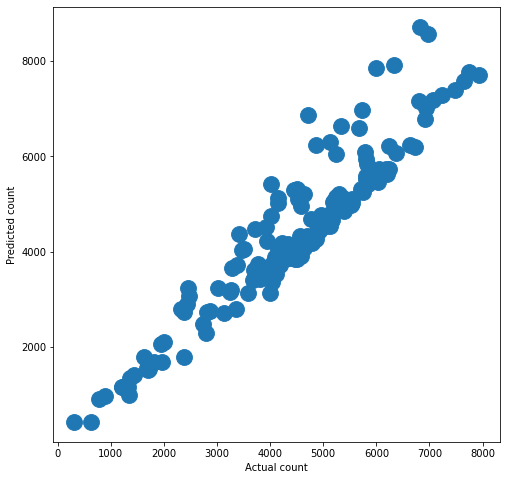

In [52]:
plt.figure(figsize=(8, 8))
plt.scatter(y_pred, y_test.values, s=250)
plt.xlabel("Actual count")
plt.ylabel("Predicted count")
plt.show()